# AI Implementation Assignment 2

#### Fig1
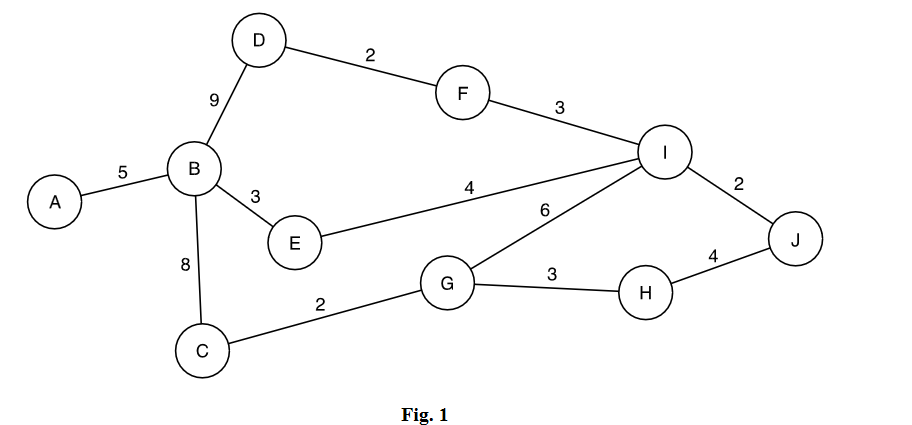


#### Q1(a) - 
####   (i) Identify one difference between a graph and a tree

#### Graph
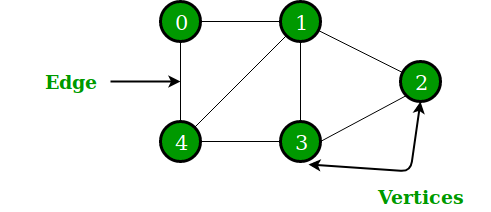


#### Tree
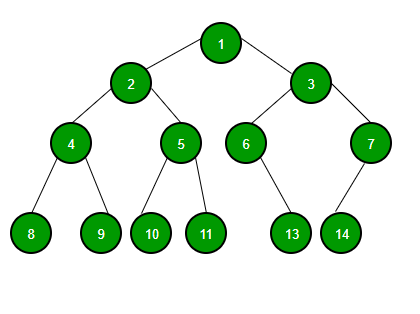

There are several differences between a graph and a tree, the first is Hierarchy, in the above cells are visual representations of each (GeeksforGeeks. (2019))
Both a Tree and a Graph are used to represent nonlinear data, Tree's however make use of the concept of a hierarchy. Data is denoted in both by nodes although in Graphs these are referred to as vertices and connections are called Edges. In Trees, nodes that are just below other nodes are called child nodes, the node above is called a parent, each node mush have a parent until we reach a root node at the beginning. A Graph on the other hand has no hierarchy its implementation is such that nodes may not be connected and in some cases can have self loops.

####     (ii) Explain how the graph is an abstraction of the problem

In order to understand why a graph is an abstraction of a problem, it is important to understand the concept of abstraction. Abstracting a problem means creating a general idea of a problem and how a solution may be discover. Any information that is not needed is disregarded such as certain specific details, for example when doing a graph on travel journeys it may not be necessary to have passanger names, car makes etc because they are not needed. This is why a graph is an abstraction of a problem, we can put together vertices and edges with distances and heuristics if needed such as delaying points but 
other details are omitted, for example Fig 1 could be a graph for bus journey, a flight plan etc but those details are not important.

####     (iii) Identify two advantages of using a visualisation 

There are multiple different types of visualisations available and they offer several advantages compared to alternatives when trying to resolve problems, 2 of them are

- 1 - Comprehension. 
It is a simple fact that people are able to grasp information much easier and quicker when using visual representations of that information. This means that much more information can be both presented and consumed than would be the case if it were merely a series of characters on a page. It also means that it is also much easier to explain what is occuring to certain audiences who may not have the specialist knowledge to look at raw data. On a related point some researchers even argue (WOLF, M., & STOODLEY, C. J. (2007)) that people are predisposed towards visual material and cues rather than writing.

- 2 - Decision Making. 
When people are presented with grapical information such as graphs or trees or various types of charts, they are much quicker in being able to see patterns that are present because what would be complex processes to discuss can be simplified using a visualisation. Using something like Fig1 again to demonstrate what maybe a complex problem for example long distance transportation and potential routes can help enormously in both understanding and driving decision making.


#### (b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1
#### through diagrams and written explanation.

Step 1

Using the diagram in Fig1 which is at the top of the notebook

Our first step using Dijkstra will be to create 2 lists, one for visited nodes and the other for visited. We get started at node A as it is the first node there is no distance or path to it and therefore it will be initialised having a value of 0.

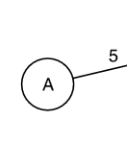

Step 2

The Second step to be taken is straightforward as there is only 1 option that is available which is from A -> B and has a value of 5. Once A has been removed from the unvisited list then B becomes the current node and this process continues until the target node has been reached.
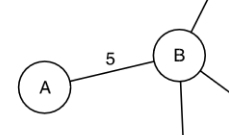

Our path total at this stage is 5

Step 3 

We have arrived at the the third step to be taken and there are 3 possible routes, these 3 represent 3 unvisited nodes of which E is the lowest value.

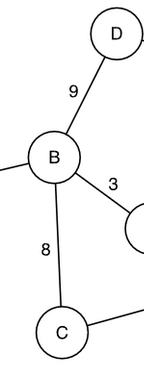

B -> D which has a value of 9

B -> C which has a value of 8

B -> E which has a value of 3

The shortest path in this is obviously B -> E with the value of 3.

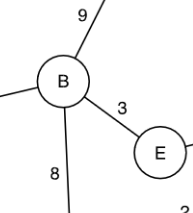

However from when we run both the Dijkstra algorithm in Q2 and also the second version of Dijkstra which is at the bottom of the notebook the next path that is visited is actually B -> C 

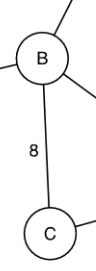

This means that our path total at this point is 13 

Step 4

The fourth step is again a straightforwrd on as there is only a singular choice available

which is from C -> G which has a value of 2.

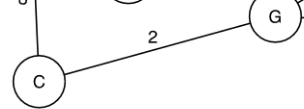

Our path total at this point is 15

Step 5

The fifth step is to go from G -> H as this is the lesser value of 3

when compared to the alternative which is G -> I and has a value of 6.

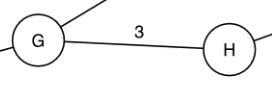

Our path total at this point is 18

Step 6

The sixth step is the final one which reaches the destination of 'J'

This is again a path with a single option to be taken which is H -> J

and has a value of 4

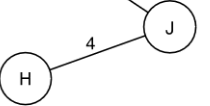

We have now reached the destination of 'J' and the total value is 22


Our visited nodes list at the end should look like the following where each node has been the current and visited all nodes and its predecessor is in square brackets.

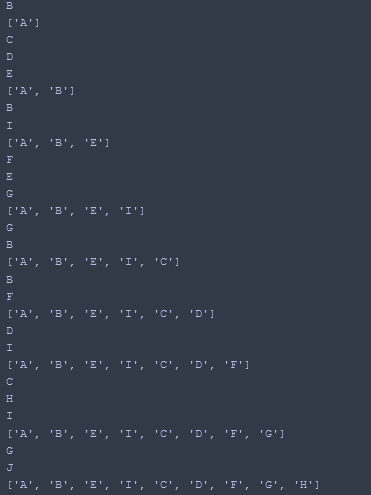

As can be seen from the diagrams, the path that our Dijkstra's Algorithm implementation took was not the expected path, it was a longer and costlier path than would be the optimal and that is one of the drawbacks with Dijkstra's algorithm. It can (and will) evaluate paths that will never provide the shortest option. I have added a second variation of the Dijkstra algorithm at the end of the notebook, this too returns the same path and I suspect that many if not all Dijkstra implementations will return the same. The only explanation that I can offer is that whatever way the vertices and weights are stored and accessed the lowest value which is B -> E is not being returned and instead B -> C which is lower than
B -> D is instead being returned and that path is then the one being followed.


#### Q2
####    The creator of the puzzle has been told that the A* algorithm is more efficient 
####    at finding the shortest path because it uses heuristics
####     Compare the performance of Dijkstra’s algorithm and the A* search algorithm, making
####     reference to heuristics, to find the shortest path to the problem by implementing both
####     algorithms programmatically and comparing the solutions generated in Mark-up (Note
####     additional marks for including time statistics) 


#### Dijkstra's Algorithm Implementation (Adapted from Gilles-bertrand.com. (2014))

In [65]:
# %%time 
# Check cell runtime, comment must be after time check which needs to
# be the first line in the cell to work and can not share a line either

# Importing time library to enable measurement of execution time
import time

# Start time
start = time.time()

def dijkstra(graph,src,dest,visited=[],distances={},predecessors={}):
    if src == dest:
        # Build the shortest path and display it
        path=[]
        pred=dest
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred,None)
        # Reverses the array for displaying
        readable=path[0]
        for index in range(1,len(path)):
            readable = path[index]+'-'+readable
            
        print("Least Cost Path: "+readable+",   Value="+str(distances[dest]))     
    else :     
        # If this is the initial node then run and initialise the cost
        if not visited: 
            distances[src]=0
        # Visit the neighbors
        for neighbor in graph[src] :
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
        
        # Then mark as visited
        visited.append(src)
        
        # All neighbors have been visited so select the node          
        # That was not visited with lowest distance 'x' and run with src='x'
        unvisited={}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))
        x=min(unvisited, key=unvisited.get)
        dijkstra(graph,x,dest,visited,distances,predecessors)

if __name__ == "__main__":
    example_graph = {
        'A': {'B': 5},
        'B': {'C': 8, 'D': 9, 'E': 3},
        'C': {'G': 2, 'B': 8},
        'D': {'B': 9, 'F': 2},
        'E': {'B': 3, 'I': 4},
        'F': {'D': 2, 'I': 3},
        'G': {'C': 2, 'H': 3, 'I': 6},
        'H': {'G': 3, 'J': 4},
        'I': {'F': 3, 'E': 4, 'G': 6},
        'J': {'I': 2, 'H': 4}
    }
    dijkstra(example_graph,'A','J')

# End time
end = time.time()
# Time take is end time - start time
print("Dijkstra Algorithm execution time is:  {}".format(end-start))

Least Cost Path: A-B-C-G-H-J,   Value=22
Dijkstra Algorithm execution time is:  0.0009996891021728516


#### A* Algorithm Code (Annytab Adapted from Administrator (2020). A* Search Algorithm in Python)

In [7]:
# %%time 

# Create a graph class
class Graph:
    # The class needs to be initialised
    # self is used to refer to the instance of the class
    # This is similar to using the 'this' in other languages
    # There is a slight difference as self must be the first parameter passed
    # __init__ is reserved as it is the constructor method
    # The graph will be directed so set the parameter to true
    # If no dictionary is given an empty one will be used
    def __init__(self, graph_dict=None, directed=True):
        # Sets the graph_dict to the instance or an empty dictionary
        self.graph_dict = graph_dict or {}
        self.directed = directed
        
        # If this is not a directed graph then set to undirected 
        # by calling the make_undirected method (From below)
        if not directed:
            self.make_undirected()
    
    # Make an undirected graph
    def make_undirected(self):
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.graph_dict.setdefault(b, {})[a] = dist
    
    # Add a link from A and B of given distance
    # Also add the inverse link if the graph is undirected
    def connect(self, A, B, distance=1):
        self.graph_dict.setdefault(A, {})[B] = distance
        if not self.directed:
            self.graph_dict.setdefault(B, {})[A] = distance
    
    # Get neighbours or a neighbour
    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

    # Return a list of nodes in the graph
    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        # This will return a set that contains all items from both sets
        # Duplicates are excluded
        nodes = s1.union(s2)
        return list(nodes)

# Create a node class which represents a node
class Node:
    # Initialise the Node class
    def __init__(self, name:str, parent:str):
        self.name = name
        self.parent = parent
        # Initialise values to 0
        # The distance to the start node
        self.g = 0
        # The distance to goal node
        self.h = 0
        # Total Cost
        self.f = 0
    
    # Compare nodes __eq__ compares 2 objects by their values
    def __eq__(self, other):
        return self.name == other.name
    
    # Sort the nodes, lt is the less than operator
    def __lt__(self, other):
        return self.f < other.f
    
    # Print node, __repr__ represents class objects as strings
    def __repr__(self):
        return ('({0},{1})'.format(self.name, self.f))

# Start time
start = time.time()    
# The a* star search method
def astar_search(graph, heuristics, start, end):
    # Create 2 lists, one for open and one for closed nodes
    open = []
    closed = []

    # Create a start node and also a goal node
    start_node = Node(start, None)
    goal_node = Node(end, None)

    # Add a start node
    open.append(start_node)

    # Loop through the open list until it is empty
    while len(open) > 0:
        # Sort the list so that you get the lowest cost node first
        # Sort() sorts the list in ascending order first
        open.sort()

        # Get the node that has the lowest cost
        current_node = open.pop(0)

        # Then add the popped node to the closed list
        closed.append(current_node)

        # Check to see if the goal has been reached then return the path
        if current_node == goal_node:
            path = []
            while current_node != start_node:
                path.append(current_node.name + ': ' + str(current_node.g))
                current_node = current_node.parent
            path.append(start_node.name + ': ' + str(start_node.g))
            # Returns the reversed path
            return path[::-1]

        # Get the neighbours
        neighbours = graph.get(current_node.name)

        # Loop through the neighbours
        for key, value in neighbours.items():
            # Creates a neighbour node
            neighbour = Node(key, current_node)

            # Checks to see if the neighbour is in rhe closed list
            if(neighbour in closed):
                continue

            # Calculate the full path cost
            neighbour.g = current_node.g + graph.get(current_node.name, neighbour.name)
            neighbour.h = heuristics.get(neighbour.name)
            neighbour.f = neighbour.g
            
            # Check to see if the neighbour is in the open list
            # Also check to see if it has a lower cost value
            if(add_to_open(open, neighbour) == True):
                # If everything is ok then add the neighbour to the open list
                open.append(neighbour)

    # Return None, no path is found
    return None
    
# Check if a neighbor should be added to open list
def add_to_open(open, neighbour):
    for node in open:
        if (neighbour == node and neighbour.f > node.f):
            return False
    return True

# The main method is the entry point into the program
# A lot of languages have this explicitly as the program entry point
def main():
    # Create a graph
    graph = Graph()

    # Create the graph connections with the appropriate distances
    graph.connect('A', 'B', 5)
    graph.connect('B', 'C', 8)
    graph.connect('B', 'D', 9)
    graph.connect('B', 'E', 3)
    graph.connect('C', 'G', 2)
    graph.connect('C', 'B', 8)
    graph.connect('D', 'B', 9)
    graph.connect('D', 'F', 2)
    graph.connect('E', 'B', 3)
    graph.connect('E', 'I', 4)
    graph.connect('F', 'D', 2)
    graph.connect('F', 'I', 3)
    graph.connect('G', 'C', 2)
    graph.connect('G', 'H', 3)
    graph.connect('G', 'I', 6)
    graph.connect('H', 'G', 3)
    graph.connect('H', 'J', 4)
    graph.connect('I', 'F', 3)
    graph.connect('I', 'E', 4)
    graph.connect('I', 'G', 6)
    graph.connect('J', 'I', 2)
    graph.connect('J', 'H', 4)

    # Make the graph undirected and create symmetric connections
    graph.make_undirected()

    # Create heuristics
    heuristics = {}
    heuristics['A'] = 0
    heuristics['B'] = 0
    heuristics['C'] = 0
    heuristics['D'] = 0
    heuristics['E'] = 0
    heuristics['F'] = 0
    heuristics['G'] = 0
    heuristics['H'] = 0
    heuristics['I'] = 0
    heuristics['J'] = 0

    # Run the search algorithm
    path = astar_search(graph, heuristics, 'A', 'J')
    print(path)
    print()

# Tells Python to run the main method
# (Goran Aviani, 2020)
if __name__ == "__main__": main()

# End time
end = time.time()
# Time taken is end time - start time
print("A* Algorithm Function execution time is:  {}".format(end-start))

['A: 0', 'B: 5', 'E: 8', 'I: 12', 'J: 14']

A* Algorithm Function execution time is:  0.0009992122650146484


#### Algorithm Comparisons
As will be seen from looking at the results of both algorithms performance in the code cells above, there are large differences both in how the algorithms performed and the result of the shortest path and associated values or costs that they returned after running. 

Firstly we will examine the path that each of the algorithms returned starting with Dijkstra's Algorithm. When the Dijkstra code above is ran it returns a path of 
A -> B -> C -> G -> H -> J and the path value is 22. Looking then at the path taken by the A* algorithm, it is A -> B -> E -> I -> J and the value is 14.

As Fig 1 is a relatively small diagram it is possible for us to trace the routes and the A* route is correct by doing some quick checks on the Fig 1 diagram. There is quite a substantial difference in the path and value returned by the 2 algorithms. 

It is worthwhile having a quick look at how these algorithms are supposed to operate starting with Dijkstra. Dijkstra works with weighted graphs, weights are the values that are associated with edges for example the edge in Fig 1 from A -> B can be said to have a weight of 5. It basically chooses the vertex that has smallest distance from the unvisited list and then visits it. Following this it will then update the distances for the neighbouring vertices of the vertex just visited until all the vertices are visited.

A* or A-Star is what is called an informed search algorithm which combines both breadth and depth first search along with some intelligence which stops it from having to conduct an expensive search of all possibilities. It also makes use of what are called Heuristics, these can be thought of as rules of thumb or estimates as there are no definitive heuristics and can change as and when needed. However good heuristics are needed as poorly chosen ones will provide poor solutions instead of the optimal solution that a good heuristic will provide.

This particular problem does not really need much of a discussion on it's heuristics as Dijkstra does not make use of them and the graph involved from Fig 1 has no heuristics mentioned, this is why I have set all node heuristics to 0 in the code, however if the were heuristics added it may affect how the shortest path calculation actually turns out.

Secondly we will look at how the algorithms performed when making use of timing, there are a few ways of using timers in Python, some are designed specifically for the notebook environment however I decided on simplicity and used a rudimentary approach by importing the Python time module and wrapping the executing code in a timer, the start time can then be subtracted from the end time.

If we start by having a look at the Dijkstra Algorithm, the runtime in seconds is 0.0009996891021728516, the A* implementation was substantially larger in lines of code so I used the timer to wrap only the Node class which contained the function that ran the actual algorithm and the running time was 0.0009992122650146484, I did this as wrapping the individual function was quick enough that a value was not recorded. 

This shows that the run time is fairly similar in this environment, it might suggest that A* maybe quicker given that it contains more lines of code. It also suggests although this maybe a matter for implementation that A* is a more accurate algorithm but again this could be affected if there were heuristics.

##### Second Dijkstra Implementation 
To verify findings of the first implementation of Dijkstra (StanislavPetrovV (2020))

In [66]:
from heapq import *

graph = {'A': [(5, 'B')],
 'B': [(8, 'C'), (9, 'D'), (3, 'E')],
 'C': [(2, 'G'), (8, 'B')],
 'D': [(9, 'B'), (2, 'F')],
 'E': [(3, 'B'), (4, 'I')],
 'F': [(2, 'D'), (3, 'I')],
 'G': [(2, 'C'), (3, 'H'), (6, 'I')],
 'H': [(3, 'G'), (4, 'J')],
 'I': [(3, 'F'), (4, 'E'), (6, 'G')],
 'J': [(2, 'I'), (4, 'H')]
}


def dijkstra(start, goal, graph):
    queue = []
    heappush(queue, (0, start))
    cost_visited = {start: 0}
    visited = {start: None}

    while queue:
        cur_cost, cur_node = heappop(queue)
        if cur_node == goal:
            break

        next_nodes = graph[cur_node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[cur_node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                heappush(queue, (new_cost, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited[neigh_node] = cur_node
    return visited

start = 'A'
goal = 'J'
visited = dijkstra(start, goal, graph)

cur_node = goal
print(f'\npath from {goal} to {start}: \n {goal} ', end='')
while cur_node != start:
    cur_node = visited[cur_node]
    print(f'---> {cur_node} ', end='')


path from J to A: 
 J ---> H ---> G ---> C ---> B ---> A 

## Reference List
Difference between graph and tree - GeeksforGeeks.
[online] Available at: https://www.geeksforgeeks.org/difference-between-graph-and-tree/

Annytab.com.
[online] Available at: https://www.annytab.com/a-star-search-algorithm-in-python/ 

 Dijkstra algorithm: How to implement it with Python (solved with all explanations) ? | Gilles’ Blog. [online] Available at: http://www.gilles-bertrand.com/2014/03/dijkstra-algorithm-python-example-source-code-shortest-path.html
 
 (WOLF, M., & STOODLEY, C. J. (2007)). Proust and the squid: the story and science of the reading brain. New York, NY, HarperCollins.
 
 StanislavPetrovV/Python-Dijkstra-BFS-A-star. [online] GitHub. Available at: https://github.com/StanislavPetrovV/Python-Dijkstra-BFS-A-star/blob/master/dijkstra.py
 
 Goran Aviani (2020). Python if __name__ == __main__ Explained with Code Examples. [online] freeCodeCamp.org. Available at: https://www.freecodecamp.org/news/if-name-main-python-example/ [Accessed 30 Apr. 2021].